# COSE474-2024F: Deep Learning HW1

## 0.1 Installation

In [1]:
!pip install d2l==1.0.3


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


## 2.1 Data Manipulation

### 2.1.1 Getting Started

In [2]:
import torch

```arange(n)``` creates a tensor of evenly spaced values from 0 (included) to n (not included) with a default interval of 1

In [3]:
x = torch.arange(15, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14.])

```numel()``` returns the number of elements in a tensor

In [4]:
x.numel()

15

The ```shape``` attribute contains the dimensionality of the tensor

In [5]:
x.shape

torch.Size([15])

```reshape()``` fits the tensor to a new dimensionality

In [6]:
x = x.reshape(5,3)
x

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.],
        [12., 13., 14.]])

```zeros()``` returns a tensor of the specified dimensions containing all zeros

In [7]:
torch.zeros(2,2,3)

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])

```ones()``` returns a tensor of the specified dimensions containing all ones

In [8]:
torch.ones(2,2,3)

tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])

```randn()``` returns a tensor of the specified dimensions containing random values

In [9]:
torch.randn(3,5)

tensor([[-0.4565,  1.2921,  0.1389, -0.7652,  0.3636],
        [ 0.0279,  1.4202, -0.6352, -0.0086, -0.9225],
        [ 1.0823, -0.8757, -0.1549,  0.9182, -0.3104]])

```tensor()``` returns a tensor containing the specified values contained in a possibly nested python list

In [10]:
torch.tensor([[1,4,7,10], [2,5,8,11], [3,6,9,12]])

tensor([[ 1,  4,  7, 10],
        [ 2,  5,  8, 11],
        [ 3,  6,  9, 12]])

### 2.1.2 Indexing and Slicing

Using Indexing and Slicing specific Elements, Rows or Columns of the tensor can be viewed or altered.

In [11]:
x[-1], x[1:3]

(tensor([12., 13., 14.]),
 tensor([[3., 4., 5.],
         [6., 7., 8.]]))

In [12]:
x[1,1] = 14
x

tensor([[ 0.,  1.,  2.],
        [ 3., 14.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.],
        [12., 13., 14.]])

In [13]:
x[:2, :] = 1
x

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.],
        [12., 13., 14.]])

### 2.1.3 Operations

There are a variety of Operations that can be applied to tensors

In [14]:
torch.exp(x)

tensor([[2.7183e+00, 2.7183e+00, 2.7183e+00],
        [2.7183e+00, 2.7183e+00, 2.7183e+00],
        [4.0343e+02, 1.0966e+03, 2.9810e+03],
        [8.1031e+03, 2.2026e+04, 5.9874e+04],
        [1.6275e+05, 4.4241e+05, 1.2026e+06]])

In [15]:
x = torch.tensor([1,2,3,4,5])
y = torch.tensor([6,7,8,9,10])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 7,  9, 11, 13, 15]),
 tensor([-5, -5, -5, -5, -5]),
 tensor([ 6, 14, 24, 36, 50]),
 tensor([0.1667, 0.2857, 0.3750, 0.4444, 0.5000]),
 tensor([      1,     128,    6561,  262144, 9765625]))

In [16]:
x = torch.arange(15, dtype=torch.float32).reshape(3,5)
y = torch.tensor([[2,1,4,3,0],[5,7,8,9,6.],[10,12.,11,13,14]])
torch.cat((x,y), dim=0), torch.cat((x,y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [ 2.,  1.,  4.,  3.,  0.],
         [ 5.,  7.,  8.,  9.,  6.],
         [10., 12., 11., 13., 14.]]),
 tensor([[ 0.,  1.,  2.,  3.,  4.,  2.,  1.,  4.,  3.,  0.],
         [ 5.,  6.,  7.,  8.,  9.,  5.,  7.,  8.,  9.,  6.],
         [10., 11., 12., 13., 14., 10., 12., 11., 13., 14.]]))

In [17]:
x == y

tensor([[False,  True, False,  True, False],
        [ True, False, False, False, False],
        [ True, False, False,  True,  True]])

In [18]:
x.sum()

tensor(105.)

### 2.1.4 Broadcasting

Using Broadcasting, tensors of different dimensionality can be added together

In [19]:
a = torch.arange(4).reshape(4,1)
b = torch.arange(2).reshape(1,2)
a, b

(tensor([[0],
         [1],
         [2],
         [3]]),
 tensor([[0, 1]]))

In [20]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3],
        [3, 4]])

### 2.1.5 Saving Memory

By modifying the tensor instead of allocating a new value to the variable Python we can perform updates to the tensors in place.

In [21]:
before = id(y)
y = y + x
before == id(y)

False

In [22]:
z = torch.zeros_like(y)
print(f'id(z): {id(z)}')
z[:] = x + y
print(f'id(z): {id(z)}')

id(z): 5436454768
id(z): 5436454768


In [23]:
before = id(x)
x += y
before == id(x)

True

### 2.1.6 Conversion to Other Python Objects

There are a variety of ways to convert tensors into other data types

In [24]:
a = x.numpy()
b = torch.from_numpy(a)
type(a), type(b)

(numpy.ndarray, torch.Tensor)

In [25]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 2.2 Data Preprocessing

### 2.2.1 Reading the Dataset

Pandas is used to load CSV (Comma-Separated values) into Python

In [26]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [27]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


### 2.2.2 Data Preparation

The data is split into input and target values. The final model should predict the target value given the specific input values.

Missing values in categorical input values (NaN) are treated as their own category.

In [28]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


Missing Values in the numerical input values (NaN) are commonly replaced with the mean value of that column.

In [29]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


### 2.2.3 Conversion to Tensor Format

After the entries are converted into numerical values, they can be loaded into tensors.

In [30]:
import torch

x = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
x, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

## 2.3 Linear Algebra

### 2.3.1 Scalars

A scalar $x\in\Bbb{R}$ can be represented as a tensor containing only one element.

In [31]:
x = torch.tensor(2.0)
y = torch.tensor(5.0)
x + y, x - y, x * y, x / y, x ** y

(tensor(7.), tensor(-3.), tensor(10.), tensor(0.4000), tensor(32.))

### 2.3.2 Vectors

A vector is a fixed-length array of scalars. It is a $1^{st}$-order Tensor.

In [32]:
x = torch.arange(5)
x

tensor([0, 1, 2, 3, 4])

Using indexing we can access the elements (scalars) in a vector.

In [33]:
x[2]

tensor(2)

```len()``` returns the length of a vector.

In [34]:
len(x)

5

Since vectors are also tensors, the attribute ```shape``` can also be used to find out the length of the vector.

In [35]:
x.shape

torch.Size([5])

### 2.3.3 Matrices

Matrices are $2^{nd}$-order Tensors.

In [36]:
A = torch.arange(9).reshape(3,3)
A

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

To transpose a Matrix, we can use the ```T``` attribute of a Matrix.

In [37]:
A.T

tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])

Square matrices which are identical to their transposed counterpart are called symmetrical.

In [38]:
A = torch.tensor([[1,0,1],[0,1,0],[1,0,1]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 2.3.4 Tensors

Tensors are a $n^{th}$-order arrays. They can have an arbitrary number of axes.

In [39]:
torch.arange(36).reshape(3,3,4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]],

        [[24, 25, 26, 27],
         [28, 29, 30, 31],
         [32, 33, 34, 35]]])

### 2.3.5 Basic Properties of Tensor Arithmetic

In [40]:
A = torch.arange(8, dtype=torch.float32).reshape(2,4)
B = A.clone()
A, A + B

(tensor([[0., 1., 2., 3.],
         [4., 5., 6., 7.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.]]))

The Hadamard Product is the element wise multiplication of two matrices. $(A\odot B)_{ij}=A_{ij}\cdot B_{ij}$

In [41]:
A * B

tensor([[ 0.,  1.,  4.,  9.],
        [16., 25., 36., 49.]])

In [42]:
a = 2
X = torch.arange(28).reshape(2,2,7)
(a * X).shape, a + X

(torch.Size([2, 2, 7]),
 tensor([[[ 2,  3,  4,  5,  6,  7,  8],
          [ 9, 10, 11, 12, 13, 14, 15]],
 
         [[16, 17, 18, 19, 20, 21, 22],
          [23, 24, 25, 26, 27, 28, 29]]]))

### 2.3.6 Reduction

Reduction reduces a tensor to one of lower order. Some functions for reduction are ```sum()``` and ``mean()```

In [43]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [44]:
A.shape, A.sum()

(torch.Size([2, 4]), tensor(28.))

In [45]:
A.shape, A.sum(axis=0).shape

(torch.Size([2, 4]), torch.Size([4]))

In [46]:
A.shape, A.sum(axis=1).shape

(torch.Size([2, 4]), torch.Size([2]))

In [47]:
A.sum(axis=[0,1]) == A.sum()

tensor(True)

In [48]:
A.mean(), A.sum() / A.numel()

(tensor(3.5000), tensor(3.5000))

In [49]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([2., 3., 4., 5.]), tensor([2., 3., 4., 5.]))

### 2.3.7 Non-Reduction Sum

It is also possible to calculate the sum without changing the order of the tensor.

In [50]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 6.],
         [22.]]),
 torch.Size([2, 1]))

In [51]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182]])

In [52]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.]])

### 2.3.8 Dot Products

There are multiple ways to calculate the dot product of two vectors.

In [53]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [54]:
torch.sum(x * y)

tensor(6.)

### 2.3.9 Matrix-Vector Products

To express a matrix-vector product or a matrix-matrix product the ```@``` operator can be used.

In [55]:
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 4]), torch.Size([4]), tensor([14., 38.]), tensor([14., 38.]))

### 2.3.10 Matrix-Matrix Product

In [56]:
B = torch.ones(4, 1)
torch.mm(A, B), A@B

(tensor([[ 6.],
         [22.]]),
 tensor([[ 6.],
         [22.]]))

### 2.3.11 Norms

To calculate the $\ell_2$ norm, the function ```norm()``` is used.

In [57]:
u = torch.tensor([2.5, 1, -12.9])
torch.norm(u)

tensor(13.1780)

To calculate the $\ell_1$ norm, the functions ```abs()``` and ```sum()``` are used.

In [58]:
torch.abs(u).sum()

tensor(16.4000)

To calculate the Frobenius norm of a matrix can be calculated using ```norm()```.

In [59]:
torch.norm(torch.ones((3, 3)))

tensor(3.)

## 2.5 Automatic Differentiation

### 2.5.1 A simple Function

In [60]:
x = torch.arange(3.0)
x

tensor([0., 1., 2.])

In [61]:
x.requires_grad_(True)
x.grad

In [62]:
y = 2 * torch.dot(x,x)
y

tensor(10., grad_fn=<MulBackward0>)

To determine the gradient of our function y with respect to x we run the ```backwards()``` function. The resulting gradient is then stored in the attribute ```grad``` of x.

In [63]:
y.backward()
x.grad

tensor([0., 4., 8.])

In [64]:
x.grad == 4 * x

tensor([True, True, True])

Before we can calculate the gradient of another function with respect to x the ```grad.zero_()``` function needs to be called.

In [65]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1.])

### 2.5.2 Backward for Non-Scalar Variables

In [66]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4.])

### 2.5.3 Detaching Computation

Through detaching we can create a variable that contains the result of our function y without being dependent on our variable x. This way the direct influence of x on z can be seen without looking at the indirect influence conveyed through y.

In [67]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True])

In [68]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True])

### 2.5.4 Gradients and Python Flow Control

In [69]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [70]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [71]:
a.grad == d / a

tensor(True)

## 3.1 Linear Regression

In [72]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

/Users/matteo/PycharmProjects/pythonProject/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### 3.1.1 Basics

#### 3.1.1.1 Model

The linear regression model describes how features can be used to estimate the target value. The assumption of linearity states that the target values can be expressed as a weighted sum of features and an intercept. Using matrix notation our model can be expressed as:
$$\hat{y}=Xw+b$$
With $w$ being a vector of the model weights and $x$ being a matrix where every observation is stored as a row with one column representing a type of feature of the observations.

#### 3.1.1.2 Loss Function

A loss function describes the fit of our model. The fit of a model describes how close our predicted values are to the actual values of the observations. A perfect prediction would have a loss of 0. In training we seek model weights that minimize the loss of our model.

#### 3.1.1.3 Analytical Solution

In a linear regression the best possible model weights for our training data can be found by solving the following analytical problem: $$w^*=(X^TX)^{-1}X^Ty$$

#### 3.1.1.4 Minibach Stochastic Gradient Descent

Instead of looking at the entire dataset or single points when performing updates to the model, using Minibach SGD uses small batches of data points to update model parameters. While it may not find the perfect solution, Minibach SGD is highly effective in Practice at minimizing loss and having a high accuracy.

#### 3.1.1.5 Predictions

Using our model we can now predict the target value of data points that were not included in the training data.

### 3.1.2 Vectorization for Speed

When training our models we want to use efficient algebraic libraries instead of using for-loops to optimize the speed of our training.

In [73]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [74]:
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time() - t:.5f} sec'

'0.05692 sec'

In [75]:
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00057 sec'

### 3.1.3 The Normal Distribution and Squared Loss

Assuming that our observations arise from noisy measurements with the noise being normally distributed, the likelyhood of observing a value y given the features x can be defined as follows:
$$P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right)$$
The goal of our training is to find model weights which maximize the likelyhood of our entire dataset.
In Practice often $-\log{P(y\mid x)}$ is minimized instead.

In [76]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

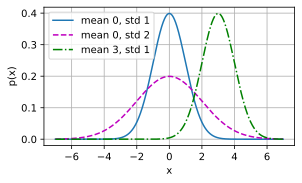

In [77]:
x = np.arange(-7, 7, 0.01)
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

### 3.1.4 Linear Regression as a Neural Network

A linear regression model can be displayed as a neural network, which each feature represented by an input neuron, which are all connected to the output.

## 3.2 Object-Oriented Design for Implementation

In [78]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 3.2.1 Utilities

In [79]:
def add_to_class(Class):
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [80]:
class A:
    def __init__(self):
        self.b = 1

a = A()

In [81]:
@add_to_class(A)
def do(self):
    print('self.b:', self.b)

a.do()

self.b: 1


In [82]:
class HyperParameters:
    def save_hyperparameters(self, ignore=[]):
        raise NotImplemented

In [83]:
class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a:', self.a, 'self.b:', self.b)
        print('There is no self.c:', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

self.a: 1 self.b: 2
There is no self.c: True


In [84]:
class ProgressBoard(d2l.HyperParameters):
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        raise NotImplemented

In [85]:
board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)

### 3.2.2 Models

The class ```Module``` is the base for all the models that will be implemented. At the very least it needs the following functions: ```__init__(), training_step()```, which receives a data batch and returns a loss value and ```configure_optimizers()```, which returns a list of optimization methods, which are used to update the parameters.

In [86]:
class Module(nn.Module, d2l.HyperParameters):
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()

    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def plot(self, key, value, train):
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

### 3.2.3 Data

The ```DataModule``` class is the base class for the data, which will be fed into the Model.

In [87]:
class DataModule(d2l.HyperParameters):
    def __init__(self, root='../data', num_workers=4):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplementedError

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

### 3.2.4 Training

The ```Trainer``` class trains the parameters of our model with the data specified in ```DataModule```.

In [88]:
class Trainer(d2l.HyperParameters):
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0, 'No GPU support yet'

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        raise NotImplementedError

## 3.4 Linear Regression Implementation From Scratch

In [89]:
%matplotlib inline
import torch
from d2l import torch as d2l

### 3.4.1 Defining the Model

Before we can optimize our models we assign random parameters drawn from a normal distribution as our model weights. We also specify the relationship between the input and parameters and the model output.

In [90]:
class LinearRegressionScratch(d2l.Module):
  def __init__(self, num_inputs, lr, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
    self.b = torch.zeros(1, requires_grad=True)

In [91]:
@d2l.add_to_class(LinearRegressionScratch)
def forward(self, X):
  return torch.matmul(X, self.w) + self.b

### 3.4.2 Defining the Loss Function

In [92]:
@d2l.add_to_class(LinearRegressionScratch)
def loss(self, y_hat, y):
  l = (y_hat - y) ** 2 / 2
  return l.mean()

### 3.4.3 Defining the Optimization Algorithm

In [93]:
class SGD(d2l.HyperParameters):
  def __init__(self, params, lr):
    self.save_hyperparameters()

  def step(self):
    for param in self.params:
      param -= self.lr * param.grad

  def zero_grad(self):
    for param in self.params:
      if param.grad is not None:
        param.grad.zero_()

In [94]:
@d2l.add_to_class(LinearRegressionScratch)
def configure_optimizers(self):
  return SGD([self.w, self.b], self.lr)

### 3.4.4 Training

After the model and the loss function are defined, the training can now begin. In each epoch of the training phase the whole dataset is iterated through, while in each iteration a random minibatch of data points is used to compute its loss, compute the gradient of the function and finally update the model parameters.

In [95]:
@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self, batch):
  return batch

@d2l.add_to_class(d2l.Trainer)
def fit_epoch(self):
  self.model.train()
  for batch in self.train_dataloader:
    loss = self.model.training_step(self.prepare_batch(batch))
    self.optim.zero_grad()
    with torch.no_grad():
      loss.backward()
      if self.gradient_clip_val > 0:
        self.clip_gradients(self.gradient_clip_val, self.model)
      self.optim.step()
    self.train_batch_idx += 1
  if self.val_dataloader is None:
    return
  self.model.eval()
  for batch in self.val_dataloader:
    with torch.no_grad():
      self.model.validation_step(self.prepare_batch(batch))
    self.val_batch_idx += 1

In [96]:
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [97]:
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.0691, -0.1512])
error in estimating b: tensor([0.2212])


## 4.1 Softmax Regression

### 4.1.1 Classification

Usually classification problems do not have a natural ordering. To represent categorical data, the one-hot encoding is used. This encoding is a vector of dimensionality n for n different classes that our input can be categorized into. The entry corresponding to the class of the input is set to 1 while the others are set to 0.

#### 4.1.1.1 Linear Model

To represent our model, we need one output for every class that our input could be assigned to. In matrix notation we can write the output as follows: $\mathbf{o} = \mathbf{W} \mathbf{x} + \mathbf{b}$

#### 4.1.1.2 The Softmax

$$\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o}) \quad \textrm{where}\quad \hat{y}_i = \frac{\exp(o_i)}{\sum_j \exp(o_j)}.$$
The softmax function increases with increasing $\mathbf{o}$ and the values of the resulting vector add up to 1, while all being non-negative. The resulting vector can be interpreted as the conditional probabilities of each class, given any input x.

#### 4.1.1.3 Vectorization

To improve efficiency our observations are grouped together in a matrix. This leads us to the following formulas:$$\begin{split}\begin{aligned} \mathbf{O} &= \mathbf{X} \mathbf{W} + \mathbf{b}, \\ \hat{\mathbf{Y}} & = \mathrm{softmax}(\mathbf{O}). \end{aligned}\end{split}$$

### 4.1.2 Loss Functions

#### 4.1.2.1 Log-Likelihood

Instead of maximizing the Likelihood of our Output being assigned to our Input according to our model, we instead minimize the negative Logarithm of our Likelihood.
$$-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^n -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
= \sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)})$$

#### 4.1.2.2 Softmax and Cross-Entropy Loss

The Cross-Entropy loss is the expected value of a loss for a distribution over labels. It measures the number of bits needed to encode what we see, relative to what we predict that should happen.

### 4.1.3 Information Theory Basics

#### 4.1.3.1 Entropy

Entropy states how much storage (nats) is needed to encode randomly drawn data from a distribution. To find out the bits needed to encode one piece of data we divide the Entropy by $\log{2}$.

#### 4.1.3.2 Surprisal

The surprisal states how surprised we are at observing a specific piece of data from a Distribution. $$\log \frac{1}{P(j)} = -\log P(j)$$

#### 4.1.3.3 Cross-Entropy Revisited

We can think of the cross-entropy classification objective in two ways: (i) as maximizing the likelihood of the observed data; and (ii) as minimizing our surprisal (and thus the number of bits) required to communicate the labels.

## 4.2 The Image Classification Dataset

In [98]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

### 4.2.1 Loading the Dataset

The Fashion-MNIST and ImageNet dataset serve as benchmarks for comparing various machine learning algorithms. Before MNIST was commonly used, but even simple modern models can easily achieve a high accuracy on this dataset.

In [99]:
class FashionMNIST(d2l.DataModule):
  def __init__(self, batch_size=64, resize=(28, 28)):
    super().__init__()
    self.save_hyperparameters()
    trans = transforms.Compose([transforms.Resize(resize),
                                transforms.ToTensor()])
    self.train = torchvision.datasets.FashionMNIST(
        root=self.root, train=True, transform=trans, download=True)
    self.val = torchvision.datasets.FashionMNIST(
        root=self.root, train=False, transform=trans, download=True)

In [100]:
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

100.0%


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100.0%


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100.0%


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100.0%

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



(60000, 10000)

In [101]:
data.train[0][0].shape

torch.Size([1, 32, 32])

In [102]:
@d2l.add_to_class(FashionMNIST)
def text_labels(self, indices):
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

### 4.2.2 Reading a Minibatch

In [103]:
@d2l.add_to_class(FashionMNIST)
def get_dataloader(self, train):
  data = self.train if train else self.val
  return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                    num_workers=self.num_workers)

In [104]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [105]:
tic = time.time()
for X, y in data.train_dataloader():
  continue
f'{time.time() - tic:.2f} sec'

'4.45 sec'

### 4.2.3 Visualization

In [106]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
  raise NotImplementedError

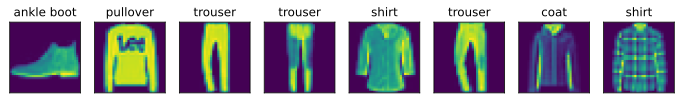

In [107]:
@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

## 4.3 The Base Classification Problem

In [108]:
import torch
from d2l import torch as d2l

### 4.3.1 The Classifier Class

The ```Classifier``` class is the base class of our classification models.

In [109]:
class Classifier(d2l.Module):
  def validation_step(self, batch):
    Y_hat = self(*batch[:-1])
    self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
    self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [110]:
@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
  return torch.optim.SGD(self.parameters(), lr=self.lr)

### 4.3.2 Accuracy

The Accuracy of a model is the percentage of correct predictions that are made by it. The following code illustrates how the Accuracy of a model is calculated:

In [111]:
@d2l.add_to_class(Classifier)
def accuracy(self, Y_hat, Y, averaged=True):
  Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
  preds = Y_hat.argmax(axis=1).type(Y.dtype)
  compare = (preds == Y.reshape(-1)).type(torch.float32)
  return compare.mean() if averaged else compare

## 4.4 Softmax Regression Implementation from Scratch

### 4.4.1 The Softmax

In [112]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

$$\mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}$$

In [113]:
def softmax(X):
  X_exp = torch.exp(X)
  partition = X_exp.sum(1, keepdims=True)
  return X_exp / partition

In [114]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1101, 0.2772, 0.1669, 0.2522, 0.1935],
         [0.2858, 0.1799, 0.1192, 0.1241, 0.2909]]),
 tensor([1., 1.]))

### 4.4.2 The Model

In [115]:
class SoftmaxRegressionScratch(d2l.Classifier):
  def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                          requires_grad=True)
    self.b = torch.zeros(num_outputs, requires_grad=True)

  def parameters(self):
    return [self.W, self.b]

In [116]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
  X = X.reshape((-1, self.W.shape[0]))
  return softmax(torch.matmul(X, self.W) + self.b)

### 4.4.3 The Cross-Entropy Loss

In [117]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

Now the Cross-Entropy Loss function is implemented. The cross-entropy takes the negative log-likelihood of the predicted probability assigned to the true label.

In [118]:
def cross_entropy(y_hat, y):
  return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [119]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
  return cross_entropy(y_hat, y)

### 4.4.4 Training

Now the model is trained for a pre specified number of epochs. The hyperparameters ```max_epochs```, ```batch_size``` and ```lr``` (learning rate) influence the performance of the model but are not learned during the primary training loop. In practice these values are chosen based on the validation split and in the end the model is evaluated on the test split.

In [120]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 4.4.5 Prediction

After training the model we can use it to classify the images in our dataset.

In [121]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

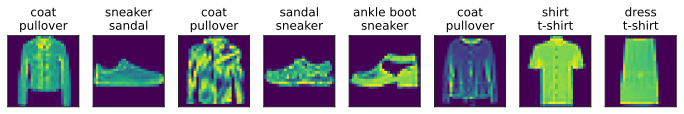

In [122]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
  data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

## 5.1 Multilayer Perceptrons

### 5.1.1 Hidden Layers

#### 5.1.1.1 Limitations of Linear Models

There are some limitations that come with using a linear model. For example, linearity assumes monotonicity, meaning an increase in a feature either always increases or decreases the model's output depending on the feature's weight. This assumption may not always be true in some applications. Deep Neural Networks overcome these limitations by using hidden layers.

#### 5.1.1.2 Incorporating Hidden Layers

The easiest way to incorporate hidden layers into a neural network, is to stack multiple fully-connected layers on top of each other. This architecture is commonly referred to as a Multilayer Perceptron (MLP).

#### 5.1.1.3 From Linear to Non-Linear

In order to prevent our Model from being able to be collapsed into a linear Model, we need to add a nonlinear activation function $\sigma$ that is applied to the output of each of our hidden layers. This leads us to the following formulas, with $\mathbf{H}$ being the output of our hidden layer and $\mathbf{O}$ being our final output.
$$\begin{split}\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}) \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}\\
\end{aligned}\end{split}$$
With this we can continue adding more hidden layers to build more general MLPs.

#### 5.1.1.4 Universal Approximators

Theoretically any function can be learned by a single hidden layer neural network given enough nodes and the right set of weights. In practice it is often not effective to do this and deeper models or kernel methods should be preferred.

### 5.1.2 Activation Functions

#### 5.1.2.1 ReLU Function

The ReLU (Rectified Linear Unit) Function is the most popular choice for activation functions. It provides a very simple but well performing non-linear transformation. $$\operatorname{ReLU}(x) = \max(x, 0)$$

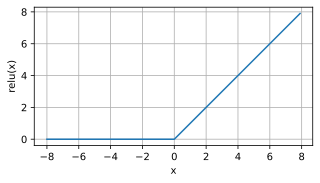

In [123]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

Plot of the derivative of the ReLU function:

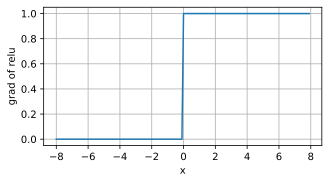

In [124]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

There are many different variations of the ReLU functions such as the pReLU function: $$\operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x).$$

5.1.2.2 Sigmoid Function

Another activation function is the Sigmoid Function.
$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$
Even though the sigmoid has largely been replaced by the simpler and more easily trainable ReLU for most use in hidden layers there are still some applications that leverage sigmoids special attributes.

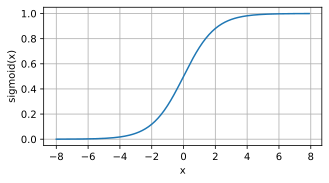

In [125]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

Plot of the derivative of the Sigmoid Function:

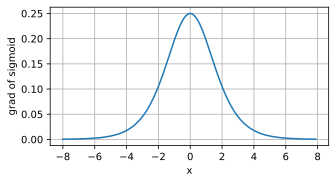

In [126]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

#### 5.1.2.3 Tanh Function

$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}$$

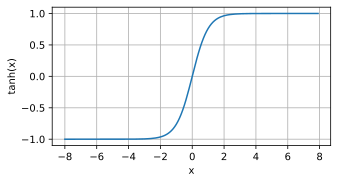

In [127]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

Plot of the derivative of the Tanh Function:

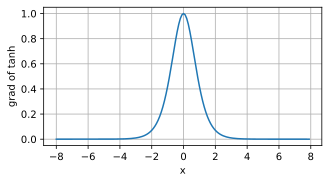

In [128]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

## 5.2 Implementation of Mulitlayer Perceptrons

The following code shows how to implement a hidden layer in our model.                                                                                                                                                          

### 5.2.1 Implementation from Scratch

#### 5.2.1.1 Initializing Model Parameters

In [129]:
class MLPScratch(d2l.Classifier):
  def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
    self.b1 = nn.Parameter(torch.zeros(num_hiddens))
    self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
    self.b2 = nn.Parameter(torch.zeros(num_outputs))

#### 5.2.1.2 Model¶

In [130]:
def relu(X):
  a = torch.zeros_like(X)
  return torch.max(X, a)

In [131]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
  X = X.reshape((-1, self.num_inputs))
  H = relu(torch.matmul(X, self.W1) + self.b1)
  return torch.matmul(H, self.W2) + self.b2

#### 5.2.1.3 Training

In [132]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 5.2.2 Concise Implementation

Using the high-level APIs we can be simplify the implementation of MLPs.

#### 5.2.2.1 Model

In [133]:
class MLP(d2l.Classifier):
  def __init__(self, num_outputs, num_hiddens, lr):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                            nn.ReLU(), nn.LazyLinear(num_outputs))

#### 5.2.2.2 Training

In [134]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

## 5.3 Forward Propagation, Backward Propagation, and Computational Graphs

### 5.3.1 Forward Propagation

Forward Propagation refers to storing and calculating intermediate variables from the input to the output layer. The result is a vector that includes all propabilities for each of the categories.

### 5.3.2 Computational Graph of Forward Propagation

Plotting Computational Graphs helps with understanding the relationships between the intermediate variables by visualizing the dependencies between operators and variables within the calculation.

### 5.3.3. Backpropagation

Backpropagation is the process of calculating the gradient of neural network parameters. It traverses the Network in reverse order, from the output to the input according to the chain rule. By doing this we can improve the model weights to improve the predictive capabilities of our model.

### 5.3.4 Training Neural Networks

Both forward and backward propagation are important for training neural networks and depend on each other. Forward propagation depends on the current model weights which are given through back propagation, while back propagation depends on the output from the hidden layers, which are given by forward propagation. When training neural networks, we alternate between these two, improving the model weights using the gradients gained through back propagation.